In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
from google.colab import drive
from tabulate import tabulate

In [2]:
%%capture
!apt update
!pip install kaggle

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Create the kaggle directory 
!mkdir ~/.kaggle

In [5]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [6]:
# Download dataset
!!kaggle datasets download -d mattop/nba-draft-basketball-player-data-19892021

['Downloading nba-draft-basketball-player-data-19892021.zip to /content',
 '',
 '  0% 0.00/89.7k [00:00<?, ?B/s]',
 '',
 '100% 89.7k/89.7k [00:00<00:00, 68.7MB/s]']

In [7]:
# Unzip folder in Colab content folder
!unzip /content/nba-draft-basketball-player-data-19892021.zip

Archive:  /content/nba-draft-basketball-player-data-19892021.zip
  inflating: nbaplayersdraft.csv     


In [8]:
# Read the csv file and save it to a dataframe called "df_reservations"
df_nba_draft = pd.read_csv('nbaplayersdraft.csv')

In [9]:
df_nba_draft.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [10]:
df_nba_draft.describe()

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


In [11]:
df_nba_draft.dtypes

id                             int64
year                           int64
rank                           int64
overall_pick                   int64
team                          object
player                        object
college                       object
years_active                 float64
games                        float64
minutes_played               float64
points                       float64
total_rebounds               float64
assists                      float64
field_goal_percentage        float64
3_point_percentage           float64
free_throw_percentage        float64
average_minutes_played       float64
points_per_game              float64
average_total_rebounds       float64
average_assists              float64
win_shares                   float64
win_shares_per_48_minutes    float64
box_plus_minus               float64
value_over_replacement       float64
dtype: object

# 1) Data Comprehension

In [12]:
# Which NBA team(s) has drafted the most players who went to Duke and were drafted in or before the 2000 draft?

In [13]:
# Group by 'team' and count 'college'
df_oneA = df_nba_draft[df_nba_draft['year'] <= 2000]
df_oneA = df_oneA.groupby(['team', 'college']).size().reset_index(name='count')
# Pivot the table
df_oneA = df_oneA.pivot_table(index='team', columns='college', values='count', fill_value=0).reset_index()

In [14]:
# Focus on just NBA teams and former Duke Player count
df_oneA = df_oneA[['team', 'Duke']]

In [15]:
# Sort values by most former Duke players
df_oneA = df_oneA[['team', 'Duke']].sort_values(by='Duke', ascending=False)

In [16]:
df_oneA.head()

college,team,Duke
15,MIN,2
5,DAL,2
20,PHO,2
10,IND,1
24,SEA,1


In [17]:
#  Which NBA team(s) has drafted the most players who have a first name that begins with D and were drafted in an even year draft (1990, 1992, 1994, ...)?

In [18]:
# Keep rows with only even draft years and players that start with letter D
df_oneAb = df_nba_draft[(df_nba_draft['year'] % 2 == 0) & (df_nba_draft['player'].str.startswith('D'))]
# Get total number of players that start with D for each team
df_oneAb = df_oneAb.groupby(['team', 'player']).size().reset_index(name = 'count')
df_oneAb = df_oneAb.groupby('team')['count'].sum().reset_index()
# Sort values by player count
df_oneAb = df_oneAb.sort_values(by = 'count', ascending=False)
df_oneAb.head(10)

,team,count
17,MIL,7
1,BOS,7
30,SEA,7
0,ATL,6
24,ORL,5
16,MIA,5
29,SAS,5
14,LAL,4
7,DAL,4
8,DEN,4


In [19]:
# Describe the relationship between a team’s first round pick slot in one year with their first-round pick slot in the subsequent year

In [20]:
# Focus on only first round players
df_oneB = df_nba_draft[df_nba_draft['overall_pick'] <= 30]

In [21]:
# Obtain number of first round picks for each team for every year
df_oneB = df_oneB.sort_values(['team', 'year'])
df_oneB = df_oneB[['year','overall_pick', 'team', 'player']]
# Obtain the average pick slot if team has multiple first round picks in same year
df_oneB['average_overall_pick'] = df_oneB.groupby(['year', 'team'])['overall_pick'].transform('mean')
df_oneB['pick_freq'] =  df_oneB.groupby(['year', 'team'])['overall_pick'].transform('count')

In [22]:
df_oneB

,year,overall_pick,team,player,average_overall_pick,pick_freq
22,1989,23,ATL,Roy Marble,23.0,1
63,1990,10,ATL,Rumeal Robinson,10.0,1
116,1991,9,ATL,Stacey Augmon,18.0,3
122,1991,15,ATL,Anthony Avent,18.0,3
137,1991,30,ATL,Rodney Monroe,18.0,3
...,...,...,...,...,...,...
167,1992,6,WSB,Tom Gugliotta,6.0,1
221,1993,6,WSB,Calbert Cheaney,18.0,2
245,1993,30,WSB,Gheorghe Mureșan,18.0,2
274,1994,5,WSB,Juwan Howard,5.0,1


In [23]:
# Obtain total number of first round picks for each team across entire dataset
df_oneB = df_oneB.drop_duplicates(['team','year'], keep ='first')
df_oneB['total_first'] = df_oneB.groupby('team')['pick_freq'].transform('sum')
df_oneB = df_oneB.sort_values(by=['total_first', 'year'], ascending=[False, True])
df_oneB

<ipython-input-23-a87cf0001dc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oneB['total_first'] = df_oneB.groupby('team')['pick_freq'].transform('sum')


,year,overall_pick,team,player,average_overall_pick,pick_freq,total_first
12,1989,13,BOS,Michael Smith,13.0,1,44
72,1990,19,BOS,Dee Brown,19.0,1,44
131,1991,24,BOS,Rick Fox,24.0,1,44
182,1992,21,BOS,Jon Barry,21.0,1,44
234,1993,19,BOS,Acie Earl,19.0,1,44
...,...,...,...,...,...,...,...
1742,2019,1,NOP,Zion Williamson,1.0,1,4
1814,2020,13,NOP,Kira Lewis Jr.,13.0,1,4
1871,2021,10,NOP,Ziaire Williams,10.0,1,4
973,2006,12,NOK,Hilton Armstrong,13.5,2,3


In [24]:


# Create draft pick frequency scatter plot
fig = px.scatter(df_oneB, x='year', y='pick_freq', color='team', hover_data=['player'])

fig.update_layout(
    title='Pick Frequency vs Year for Each Team',
    xaxis_title='Year',
    yaxis_title='Pick Frequency',
    hovermode='closest'
)

fig.show()

In [25]:
# Keep necessary columns
team_avg_pick = df_oneB[['year', 'team', 'average_overall_pick']].dropna()

# Plot average overall pick slot for each team across timespan of datset
fig = px.line(team_avg_pick, x='year', y='average_overall_pick', color='team')

fig.update_layout(
    title='Average Overall Pick vs. Year for Each Team',
    xaxis_title='Year',
    yaxis_title='Average Overall Pick'
)

fig.show()



# 2) Analytical Acumen

## Assign Pick Values

In [26]:
# Assign each player individual player efficiency rating (PER)
df_nba_draft['PER'] =  (1 / df_nba_draft['minutes_played']) * ((df_nba_draft['points'] + 2/3*df_nba_draft['assists'] + 1/2*df_nba_draft['total_rebounds']))

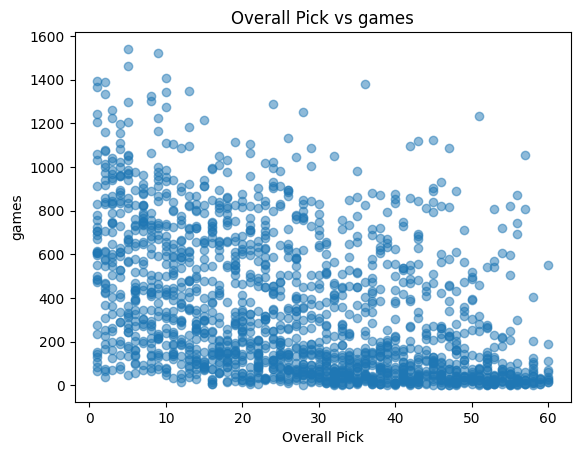

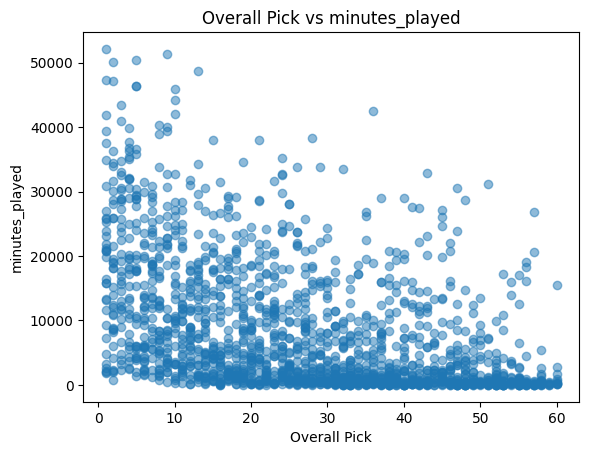

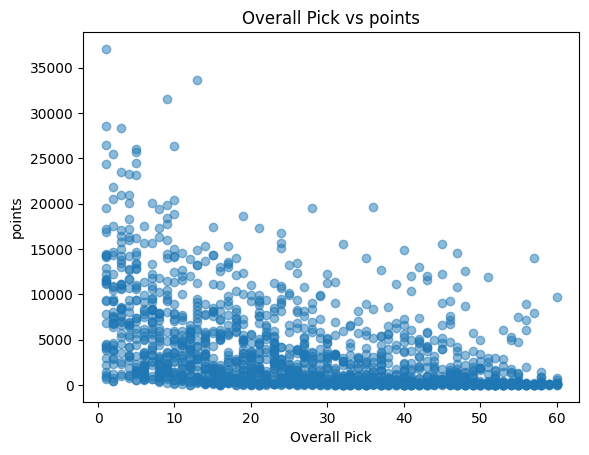

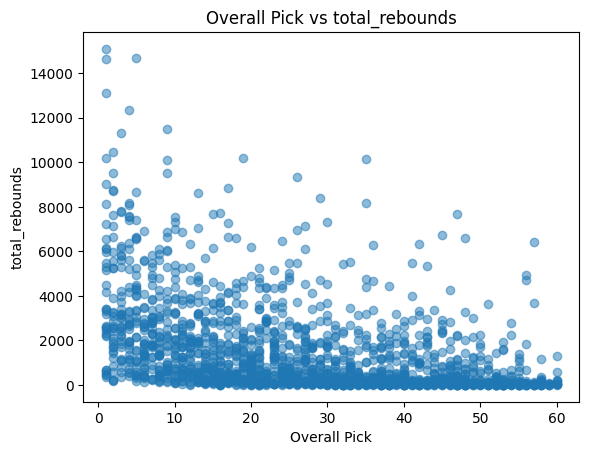

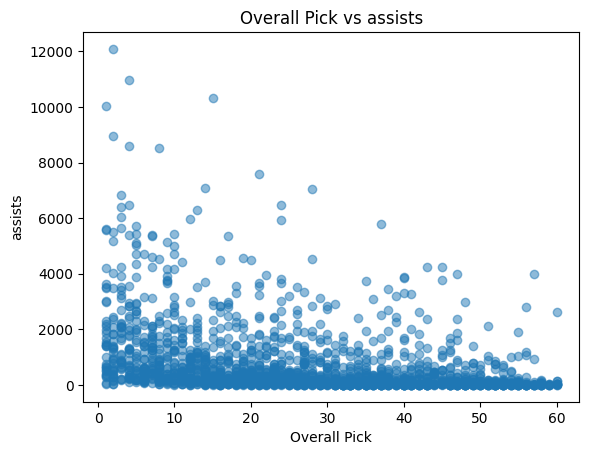

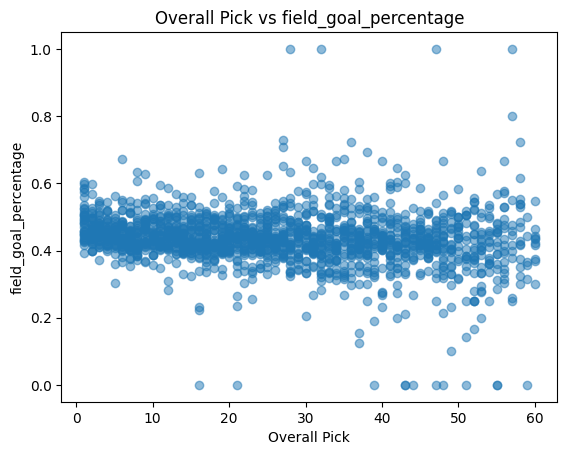

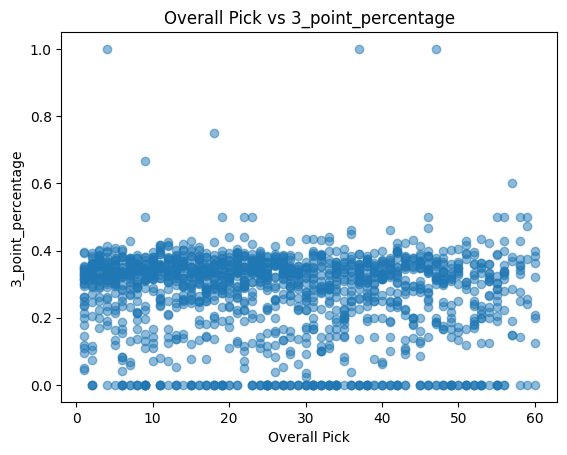

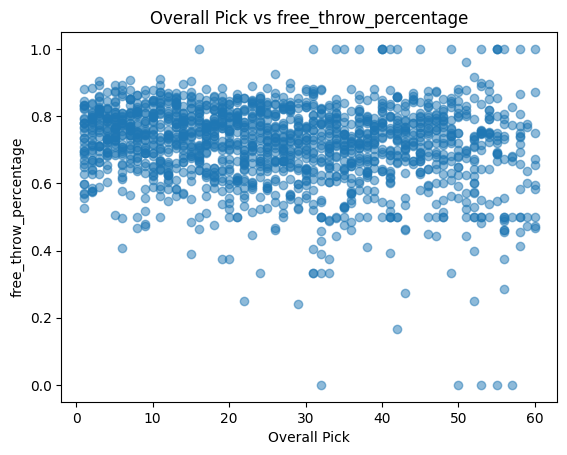

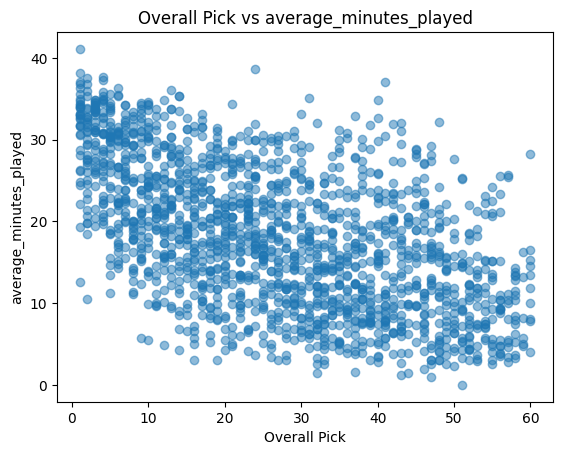

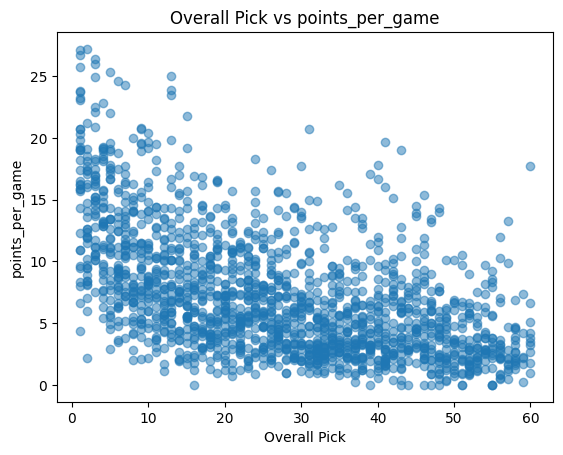

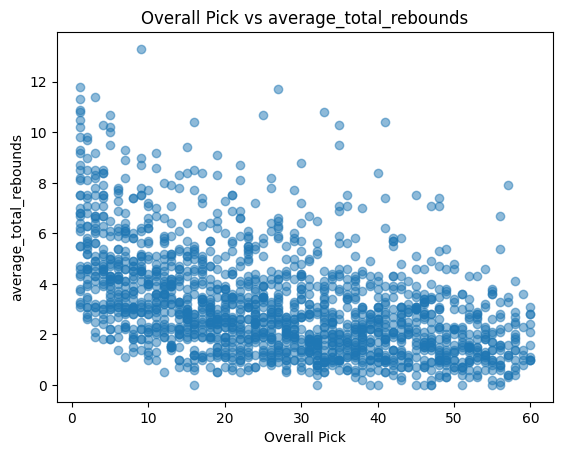

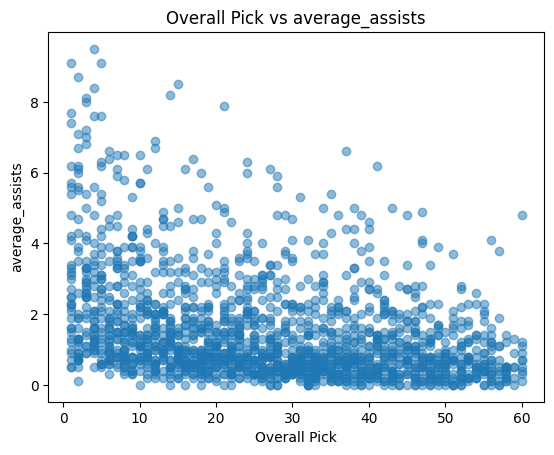

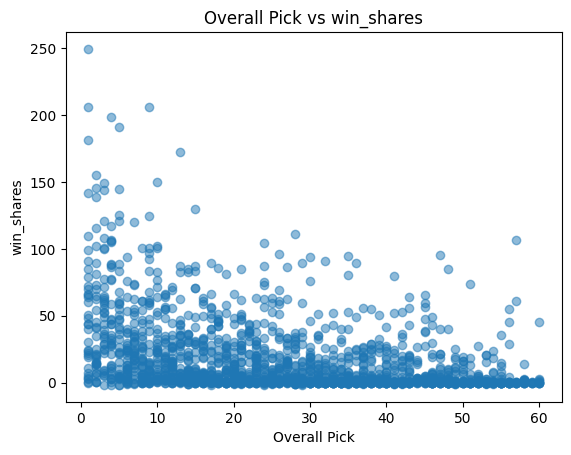

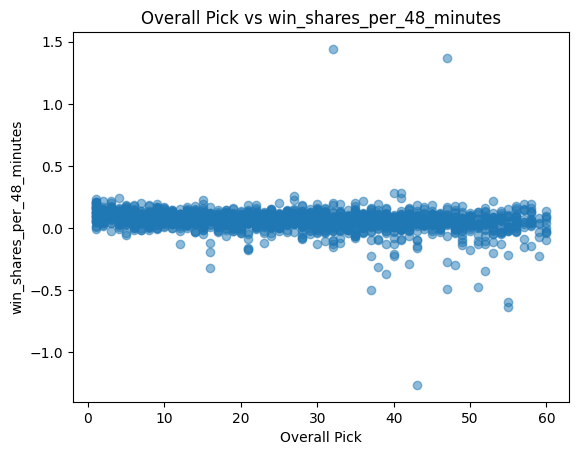

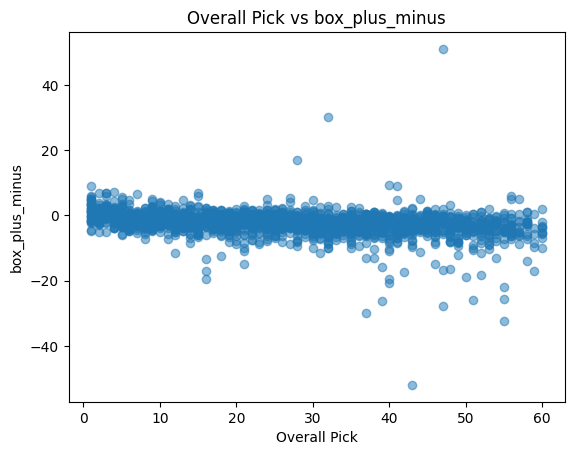

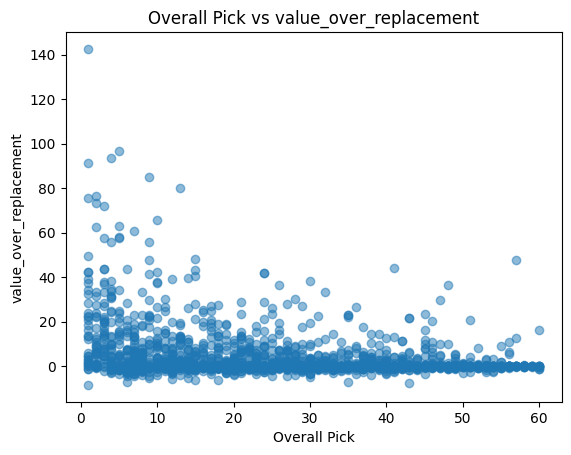

In [27]:
# Plot every feature against overall pick to see any visual relationshp

# Select the numerical features to plot
numerical_features = ['games', 'minutes_played', 'points', 'total_rebounds', 'assists',
                      'field_goal_percentage', '3_point_percentage', 'free_throw_percentage',
                      'average_minutes_played', 'points_per_game', 'average_total_rebounds', 'average_assists',
                      'win_shares', 'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement']

# Plot overall_pick vs each numerical feature
for feature in numerical_features:
    plt.scatter(df_nba_draft['overall_pick'], df_nba_draft[feature], alpha=0.5)
    plt.xlabel('Overall Pick')
    plt.ylabel(feature)
    plt.title(f'Overall Pick vs {feature}')
    plt.show()


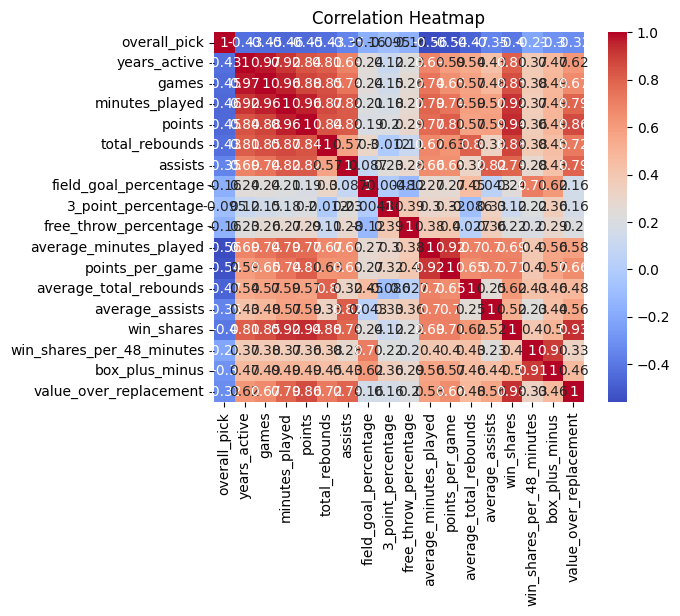

In [28]:
# Create correlation heatmap for all numeric features in dataset

# Select the numeric features to include in the correlation heatmap
numeric_features = df_nba_draft.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop(['id', 'year', 'rank', 'PER'])

# Calculate and plot the correlation matrix/heatmap
correlation_matrix = df_nba_draft[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

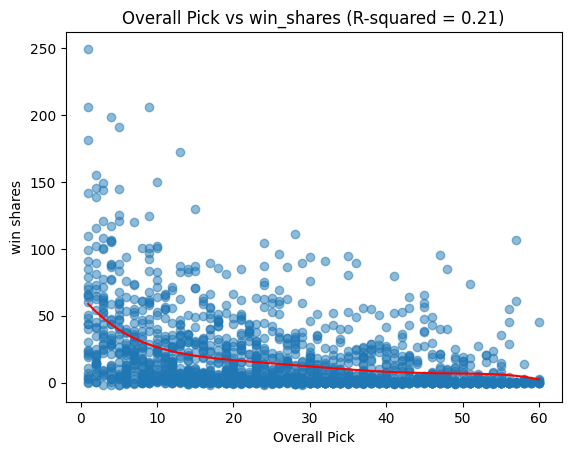

In [29]:
# Create polynomial regression model for win shares vs overall pick slot

# Drop rows with missing values in 'PER' column
win_shares = df_nba_draft['win_shares'].dropna()

# Drop the same rows in the 'df_nba_draft' DataFrame
df_nba_draft_filtered = df_nba_draft.dropna(subset=['win_shares'])

degree = 5 
X = df_nba_draft_filtered['overall_pick'].values.reshape(-1, 1)
y = win_shares.values.reshape(-1, 1)

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predict the values using the polynomial regression model
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)

# Plot the data points
plt.scatter(df_nba_draft_filtered['overall_pick'], win_shares, alpha=0.5)
sorted_indices = np.argsort(X.flatten())
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the polynomial fit line
plt.plot(X_sorted, y_pred_sorted, color='red')


plt.xlabel('Overall Pick')
plt.ylabel('win shares')
plt.title(f'Overall Pick vs win_shares (R-squared = {r2:.2f})')
plt.show()

In [30]:
# Assign draft pick value for each player given their overall pick slot

# Get the coefficients of the polynomial regression model
coefficients = model.coef_[0].tolist()
intercept = model.intercept_

# Create a list to store the polynomial terms
terms = []

# Create the polynomial terms
for i, coefficient in enumerate(coefficients):
    term = f'({coefficient:.2f} * x^{i})'
    terms.append(term)

# Create a DataFrame for draft picks 1-60
df_draft_picks = pd.DataFrame({'overall_pick': range(1, 61)})

# Calculate the draft pick value using the polynomial equation
X_pred = poly_features.transform(df_draft_picks['overall_pick'].values.reshape(-1, 1))
y_pred = model.predict(X_pred)

# Add the draft pick value to the DataFrame
df_draft_picks['draft_pick_value'] = y_pred
df_draft_picks['draft_pick_value_normalized'] = df_draft_picks['draft_pick_value'] / df_draft_picks['draft_pick_value'][0]
normal_value_pick = df_draft_picks['draft_pick_value_normalized']
df_nba_draft['draft_pick_value'] = df_nba_draft['overall_pick'].map(lambda x: normal_value_pick[x-1])

In [31]:
df_nba_draft

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,PER,draft_pick_value
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,0.564105,1.000000
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,0.468979,0.901999
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5,0.547329,0.815610
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9,0.626769,0.739704
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,0.507254,0.673222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1918,2021,56,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,...,3.5,0.5,0.0,0.5,0.0,0.164,6.0,0.0,0.238095,0.095320
1918,1919,2021,57,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086231
1919,1920,2021,58,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,...,13.5,2.2,4.1,0.5,1.5,0.128,-1.7,0.0,0.339640,0.074348
1920,1921,2021,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059117


In [32]:
# Look at all draft pick values
table1 = df_nba_draft[['overall_pick', 'draft_pick_value']].tail(60)

print(tabulate(table1, headers='keys', tablefmt='psql'))


+------+----------------+--------------------+
|      |   overall_pick |   draft_pick_value |
|------+----------------+--------------------|
| 1862 |              1 |          1         |
| 1863 |              2 |          0.901999  |
| 1864 |              3 |          0.81561   |
| 1865 |              4 |          0.739704  |
| 1866 |              5 |          0.673222  |
| 1867 |              6 |          0.615178  |
| 1868 |              7 |          0.564654  |
| 1869 |              8 |          0.520799  |
| 1870 |              9 |          0.482824  |
| 1871 |             10 |          0.450005  |
| 1872 |             11 |          0.421675  |
| 1873 |             12 |          0.397224  |
| 1874 |             13 |          0.376097  |
| 1875 |             14 |          0.357793  |
| 1876 |             15 |          0.341859  |
| 1877 |             16 |          0.327891  |
| 1878 |             17 |          0.315529  |
| 1879 |             18 |          0.304458  |
| 1880 |     

## Who underperformed and overperformed?

In [33]:
for i in range(61):
    print(df_nba_draft[df_nba_draft['overall_pick'] == i].describe())

        id  year  rank  overall_pick  years_active  games  minutes_played  \
count  0.0   0.0   0.0           0.0           0.0    0.0             0.0   
mean   NaN   NaN   NaN           NaN           NaN    NaN             NaN   
std    NaN   NaN   NaN           NaN           NaN    NaN             NaN   
min    NaN   NaN   NaN           NaN           NaN    NaN             NaN   
25%    NaN   NaN   NaN           NaN           NaN    NaN             NaN   
50%    NaN   NaN   NaN           NaN           NaN    NaN             NaN   
75%    NaN   NaN   NaN           NaN           NaN    NaN             NaN   
max    NaN   NaN   NaN           NaN           NaN    NaN             NaN   

       points  total_rebounds  assists  ...  average_minutes_played  \
count     0.0             0.0      0.0  ...                     0.0   
mean      NaN             NaN      NaN  ...                     NaN   
std       NaN             NaN      NaN  ...                     NaN   
min       NaN         

In [34]:
# Create dictionary of expected and standard deviation values of important stats for each pick 1-60
d = {}
for i in range(61):
    stat_info = df_nba_draft[df_nba_draft['overall_pick'] == i].describe().loc[['mean','std']].reset_index()
    stat_info_df = stat_info.add_prefix('expected_')
    d[i] = stat_info_df.drop(['expected_id', 'expected_year', 'expected_rank', 'expected_draft_pick_value'], axis=1)
    


In [35]:
# Helper function to calculate performance value for each player
def helper(x, y):
    results = []
    for i in range(len(x.columns)):
      if x.iloc[0, i] - y.iloc[0, i] > 0:
        if x.iloc[0, i] - y.iloc[0, i] > y.iloc[1, i]:
          if y.columns[i] == 'expected_win_shares_per_48_minutes' or y.columns[i] == 'expected_win_shares':
            results.append(10)
          elif y.columns[i] == 'expected_value_over_replacement':
            results.append(5)
          else:
            results.append(2)
        else: 
          results.append(0)
      elif x.iloc[0, i] -  y.iloc[0, i] < 0:
        if x.iloc[0, i] -  y.iloc[0, i] < -y.iloc[1, i]:
          if y.columns[i] == 'expected_win_shares_per_48_minutes' or y.columns[i] == 'expected_win_shares':
            results.append(-10)
          elif y.columns[i] == 'expected_value_over_replacement':
            results.append(-5)
          else:
            results.append(-2)
        else:
          results.append(0)
      else:
        results.append(0)

    return sum(results)


In [36]:
# Drop expected index column for each DataFrame in each dictionary
for i in range(len(d)):
    d[i] = d[i].drop('expected_index', axis=1)

In [37]:
# Subset needed for helper function
draft_temp = df_nba_draft.drop(['id', 'year', 'rank', 'team', 'player', 'college', 'draft_pick_value'], axis=1)
draft_temp

,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,field_goal_percentage,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,PER
0,1,11.0,474.0,11593.0,4494.0,3170.0,691.0,0.510,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,0.564105
1,2,13.0,917.0,18133.0,6439.0,2550.0,1185.0,0.446,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,0.468979
2,3,12.0,742.0,24502.0,10544.0,3204.0,1897.0,0.465,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5,0.547329
3,4,15.0,1000.0,34985.0,18336.0,4387.0,2097.0,0.456,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9,0.626769
4,5,11.0,672.0,15370.0,5680.0,3381.0,639.0,0.472,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,0.507254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,56,1.0,2.0,7.0,1.0,0.0,1.0,NaN,NaN,0.500,3.5,0.5,0.0,0.5,0.0,0.164,6.0,0.0,0.238095
1918,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,58,1.0,41.0,555.0,90.0,169.0,21.0,0.722,NaN,0.414,13.5,2.2,4.1,0.5,1.5,0.128,-1.7,0.0,0.339640
1920,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Apply helper function to subset and append every perfomance value to seperate list

running_result = []

for i in range(len(draft_temp)):
    res = helper(draft_temp.iloc[i:i+1].drop('overall_pick', axis=1), d[(draft_temp.iloc[i:i+1]).iloc[0,0]])
    running_result.append(res)

running_result

[-20,
 -14,
 -3,
 6,
 -10,
 -10,
 -20,
 -16,
 -8,
 18,
 10,
 12,
 -14,
 20,
 -10,
 16,
 16,
 -4,
 -14,
 -16,
 -4,
 12,
 -32,
 -12,
 -10,
 20,
 -12,
 0,
 -12,
 -14,
 -10,
 -10,
 -16,
 -14,
 -10,
 26,
 -4,
 -4,
 -12,
 -2,
 -10,
 0,
 -6,
 0,
 -14,
 -18,
 0,
 0,
 2,
 -10,
 -14,
 -8,
 0,
 0,
 6,
 10,
 -23,
 4,
 6,
 -10,
 -18,
 -20,
 -10,
 -10,
 -14,
 -24,
 -6,
 -10,
 -16,
 -2,
 -12,
 -8,
 14,
 -8,
 -8,
 -10,
 -18,
 -12,
 -8,
 -12,
 -2,
 -14,
 20,
 -8,
 -8,
 -12,
 -14,
 -8,
 -10,
 -8,
 -6,
 -4,
 -10,
 0,
 -12,
 -6,
 -6,
 -8,
 -6,
 14,
 -4,
 20,
 0,
 -14,
 -2,
 -14,
 0,
 -8,
 6,
 8,
 -25,
 8,
 16,
 -16,
 -22,
 -16,
 -4,
 -6,
 10,
 4,
 18,
 -20,
 -12,
 -6,
 -8,
 -14,
 -10,
 -16,
 16,
 -10,
 -20,
 -6,
 0,
 -12,
 -6,
 -8,
 0,
 -16,
 -4,
 4,
 -6,
 -16,
 -2,
 -8,
 -2,
 0,
 -10,
 -10,
 -10,
 0,
 -14,
 0,
 18,
 -4,
 0,
 -4,
 -6,
 0,
 -4,
 0,
 0,
 0,
 6,
 8,
 -1,
 -14,
 -6,
 18,
 4,
 -6,
 -2,
 -8,
 10,
 -26,
 -6,
 -6,
 -6,
 -10,
 16,
 -6,
 -6,
 -4,
 16,
 16,
 -16,
 20,
 -12,
 -16,
 -10,
 -10,
 0,
 -8

In [39]:
# Sanity check to make sure helper function assigned value for every player in dataset
len(running_result)


1922

In [40]:
# Convert list to appropriate DataFrame
running_result = pd.DataFrame(running_result, columns=['Performance Value'])
running_result

,Performance Value
0,-20
1,-14
2,-3
3,6
4,-10
...,...
1917,8
1918,0
1919,-3
1920,0


In [41]:
# Concatenante performance value DataFrame to end of original dataset to create new feautre of Performance Value of each player
df_nba_draft = pd.concat([df_nba_draft, running_result], axis=1)

In [42]:
df_nba_draft

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,PER,draft_pick_value,Performance Value
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,0.564105,1.000000,-20
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,0.468979,0.901999,-14
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,14.2,4.3,2.6,55.7,0.109,0.2,13.5,0.547329,0.815610,-3
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,18.3,4.4,2.1,88.7,0.122,0.8,24.9,0.626769,0.739704,6
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,0.507254,0.673222,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1918,2021,56,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,...,0.5,0.0,0.5,0.0,0.164,6.0,0.0,0.238095,0.095320,8
1918,1919,2021,57,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086231,0
1919,1920,2021,58,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,...,2.2,4.1,0.5,1.5,0.128,-1.7,0.0,0.339640,0.074348,-3
1920,1921,2021,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059117,0


In [43]:
# Sanity Check
random_four_1st = df_nba_draft[(df_nba_draft['overall_pick'] == 1) & (df_nba_draft['player'].isin(['LeBron James', 'Kwame Brown', 'Allen Iverson', 'Anthony Bennett']))][['overall_pick','player', 'Performance Value']]
print(tabulate(random_four_1st, headers='keys', tablefmt='psql'))

+------+----------------+-----------------+---------------------+
|      |   overall_pick | player          |   Performance Value |
|------+----------------+-----------------+---------------------|
|  382 |              1 | Allen Iverson   |                  10 |
|  671 |              1 | Kwame Brown     |                 -20 |
|  785 |              1 | LeBron James    |                  14 |
| 1382 |              1 | Anthony Bennett |                 -26 |
+------+----------------+-----------------+---------------------+


### Best NBA Team at Drafting?

In [44]:
# Aggregate Performance Value of all players of same drafted NBA team
perform_value_sum = df_nba_draft.groupby('team')['Performance Value'].sum().reset_index().sort_values(by='Performance Value', ascending=False)
perform_value_sum

,team,Performance Value
21,NOH,36
22,NOK,-62
37,WSB,-68
2,BRK,-70
4,CHH,-73
35,VAN,-73
33,TOR,-89
31,SAS,-112
3,CHA,-121
6,CHO,-123


In [45]:
# Add aggregate Performance Values of inactive teams to their active franchises
perform_value_sum.loc[perform_value_sum['team'] == 'BRK', 'Performance Value'] += perform_value_sum[perform_value_sum['team'] == 'NJN'].iloc[0,1]
perform_value_sum.loc[perform_value_sum['team'] == 'OKC', 'Performance Value'] += perform_value_sum[perform_value_sum['team'] == 'SEA'].iloc[0,1]
perform_value_sum.loc[perform_value_sum['team'] == 'MEM', 'Performance Value'] += perform_value_sum[perform_value_sum['team'] == 'VAN'].iloc[0,1]
perform_value_sum.loc[perform_value_sum['team'] == 'WSH', 'Performance Value'] += perform_value_sum[perform_value_sum['team'] == 'WSB'].iloc[0,1]
perform_value_sum.loc[perform_value_sum['team'] == 'NOP', 'Performance Value'] += perform_value_sum[perform_value_sum['team'] == 'NOH'].iloc[0,1] + perform_value_sum[perform_value_sum['team'] == 'NOK'].iloc[0,1] + perform_value_sum[perform_value_sum['team'] == 'CHH'].iloc[0,1]
perform_value_sum.loc[perform_value_sum['team'] == 'CHO', 'Performance Value'] += perform_value_sum[perform_value_sum['team'] == 'CHA'].iloc[0,1]

In [46]:
# Exclude the inactive franchises
perform_value_sum = perform_value_sum[~perform_value_sum['team'].isin(['SEA', 'CHA', 'VAN', 'CHH', 'WSB', 'NOH', 'NOK', 'NJN'])]
perform_value_sum

,team,Performance Value
2,BRK,-297
33,TOR,-89
31,SAS,-112
6,CHO,-244
23,NOP,-231
25,OKC,-295
15,LAL,-142
12,HOU,-158
16,MEM,-261
13,IND,-214


In [48]:
# Standardize performance value based on mean and standard deviation
perform_value_sum = perform_value_sum.sort_values(by='Performance Value', ascending=False)
perform_value_sum['Performance Value Standardized'] = (perform_value_sum['Performance Value'] - perform_value_sum['Performance Value'].mean()) / perform_value_sum['Performance Value'].std()
perform_value_sum 


,team,Performance Value,Performance Value Standardized
33,TOR,-89,1.967222
31,SAS,-112,1.760996
15,LAL,-142,1.492004
12,HOU,-158,1.348542
13,IND,-214,0.846426
23,NOP,-231,0.693997
9,DEN,-234,0.667098
36,WAS,-236,0.649165
6,CHO,-244,0.577434
16,MEM,-261,0.425006


In [49]:
# Plot standardized aggregate performance value vs team

fig = go.Figure(data=go.Bar(x=perform_value_sum['team'], y=perform_value_sum['Performance Value Standardized'], marker_color='blue'))

fig.update_layout(
    xaxis=dict(title='Team'),
    yaxis=dict(title='Performance Value Standardized'),
    title='Standardized Performance Value by Team'
)

fig.show()

### Which College Teams outputting best players?

In [50]:
# Group by college and calculate sum of perform value and count of players
college_stats = df_nba_draft.groupby('college').agg({'Performance Value': 'sum', 'player': 'count'}).reset_index()

# Rename columns
college_stats.rename(columns={'player': 'Player Count'}, inplace=True)
college_stats = college_stats.sort_values(by = ['Performance Value', 'Player Count'], ascending= (True, False))
college_stats

,college,Performance Value,Player Count
48,Duke,-406,57
83,Kansas,-360,40
174,Syracuse,-344,30
2,Arizona,-271,43
195,UNC,-213,43
...,...,...,...
70,IUPUI,18,1
104,Miami University,18,1
181,Texas A&M,26,6
159,Santa Clara,26,1


In [51]:
# Create the scatter plot of Performance Value vs Player Count for each team
fig = go.Figure(data=go.Scatter(
    x=college_stats['Performance Value'],
    y=college_stats['Player Count'],
    mode='markers',
    text=college_stats['college'],
    marker=dict(
        size=10,
        color=['blue' if college != 'Florida' and college != 'Wake Forest' else 'red' for college in college_stats['college']],
        opacity=0.7
    )

))

fig.update_layout(
    title='Performance Value vs Player Count by College',
    xaxis=dict(title='Performance Value'),
    yaxis=dict(title='Player Count'),
    hovermode='closest'
)

hover_template = '<b>%{text}</b><br>Performance Value: %{x}<br>Player Count: %{y}'
fig.update_traces(hovertemplate=hover_template)
fig.show(config={'displayModeBar': False})


In [52]:
college_stats.describe()

,Performance Value,Player Count
count,237.000000,237.000000
mean,-34.405063,6.687764
std,59.875617,9.458405
min,-406.000000,1.000000
25%,-36.000000,1.000000
50%,-16.000000,2.000000
75%,-4.000000,10.000000
max,50.000000,58.000000
